# Enviroment

In [2]:
library(Seurat)
library(patchwork)
library(tidyverse) 

library(SingleR)
library(celldex)
library(SingleCellExperiment)

set.seed(1234)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [3]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3 
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] SingleCellExperiment_1.26.0 celldex_1.14.0             
 [3] SingleR_2.6.0               SummarizedExperiment_1.34.0
 [5] Biobase_2.64.0              GenomicRanges_1.56.2       
 [7] GenomeInfoDb_1.40.1         IRanges_2.38.1             


In [4]:
# Define directories
dir_fig <- "../../results/sc_rna/06_02_myeloid/figures"
dir_int <- "../../results/sc_rna/06_02_myeloid/intermediate"

# Make sure directories exist
dir.create(dir_fig, recursive = TRUE, showWarnings = FALSE)
dir.create(dir_int, recursive = TRUE, showWarnings = FALSE)

# Myeloid SubClustering

In [5]:
merged <- readRDS("../../results/sc_rna/06_01_overall/intermediate/06_annotation/merged_pca.rds")

In [6]:
Mono <- subset(merged, idents = "MDSC")
Mono <- NormalizeData(Mono)
Mono <- FindVariableFeatures(Mono, selection.method = "vst", nfeatures = 2000)
Mono <- ScaleData(Mono)
Mono <- RunPCA(Mono)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  Gapdh, Mif, Basp1, Hilpda, Ftl1, Ctsd, Arg1, Lgmn, Aldoa, Dab2 
	   Pgk1, Tpi1, C3ar1, Hmox1, Ldha, Fth1, Ero1l, Plin2, Cstb, Adam8 
	   Bnip3, Ctsl, Gpi1, Emp1, Bsg, Tmem189, Eno1, Egln3, Spp1, Lgals3 
Negative:  Samhd1, Plac8, Ifitm6, Zyx, Itgal, Lyz2, Ifi47, Mgst1, Pnp, Itga4 
	   Adgre5, Calhm6, Hp, Sell, Fam49a, Gpr141, Gbp3, Apobec3, Irf1, Ly6c2 
	   Ms4a4c, Crip1, Slfn5, Mndal, Rassf4, Ifi203, Gsr, Rnase6, Irf8, Smpdl3a 
PC_ 2 
Positive:  Ifngr1, Add3, Ssh2, Pou2f2, Ypel3, Idh1, Rgs10, Cx3cr1, Smpdl3a, Gsr 
	   Hacd4, Ccdc88c, Clec4a3, Fam129a, Gpcpd1, Selenop, Adgre5, Creg1, Akap13, Rpl12 
	   Rasgrp2, Cd300a, Nav1, Fn1, Mbp, Trem2, Gngt2, Hp, Hexa, Stk10 
Negative:  Gbp2, Cd274, Isg15, Upp1, Cnn3, Cxcl9, Gbp4, Ifi205, Acod1, Slamf8 
	   Pfkp, Serpina3g, Hk3, Sod2, I

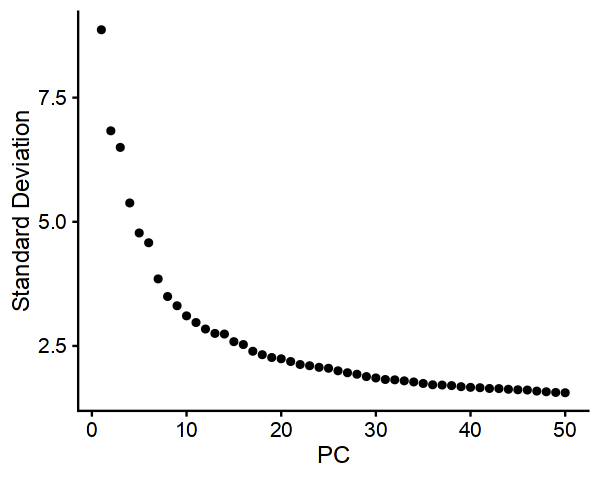

In [7]:
# --- ElbowPlot ---
options(repr.plot.width = 5, repr.plot.height = 4)
ElbowPlot(Mono, ndims = 50)

In [8]:
Mono <- FindNeighbors(Mono, dims = 1:30)
Mono <- FindClusters(Mono, resolution = c(0.1, 0.2, 0.3, 0.4))
Mono <- RunUMAP(Mono, dims = 1:30)
Mono <- RunTSNE(Mono, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3695
Number of edges: 134847

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9173
Number of communities: 3
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3695
Number of edges: 134847

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8778
Number of communities: 4
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3695
Number of edges: 134847

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8530
Number of communities: 5
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3695
Number of edges: 134847

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8313
Number of communities: 7
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
04:15:58 UMAP embedding parameters a = 0.9922 b = 1.112

04:15:58 Read 3695 rows and found 30 numeric columns

04:15:58 Using Annoy for neighbor search, n_neighbors = 30

04:15:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

04:15:58 Writing NN index file to temp file /tmp/RtmpUIGFiX/file527073aad1b6

04:15:58 Searching Annoy index using 1 thread, search_k = 3000

04:15:59 Annoy recall = 100%

04:16:00 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

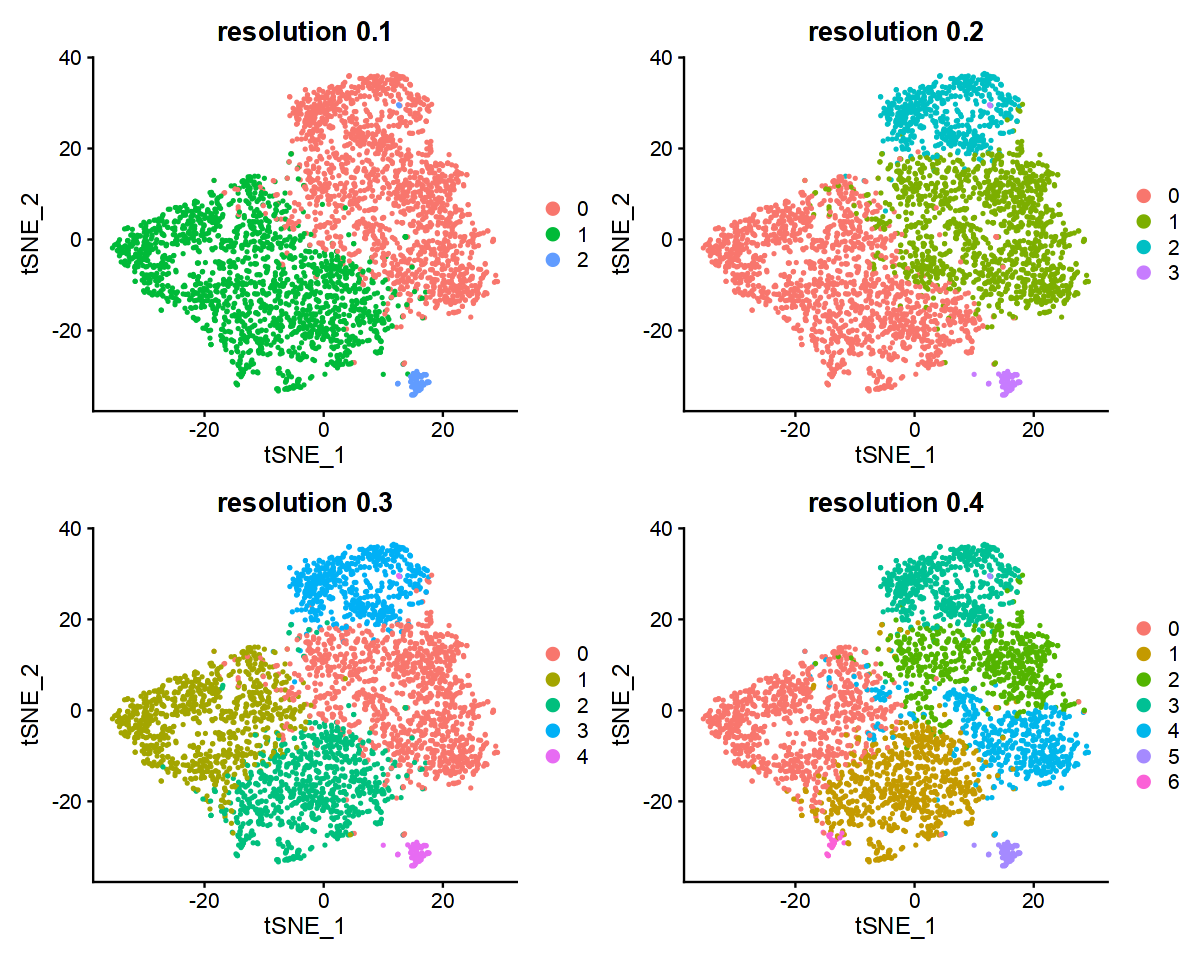

In [9]:
r01 <- DimPlot(Mono, reduction = "tsne", group.by = "RNA_snn_res.0.1") + labs(title = "resolution 0.1")
r02 <- DimPlot(Mono, reduction = "tsne", group.by = "RNA_snn_res.0.2") + labs(title = "resolution 0.2")
r03 <- DimPlot(Mono, reduction = "tsne", group.by = "RNA_snn_res.0.3") + labs(title = "resolution 0.3")
r04 <- DimPlot(Mono, reduction = "tsne", group.by = "RNA_snn_res.0.4") + labs(title = "resolution 0.4")

options(repr.plot.width = 10, repr.plot.height = 8)
r01 + r02 + r03 + r04

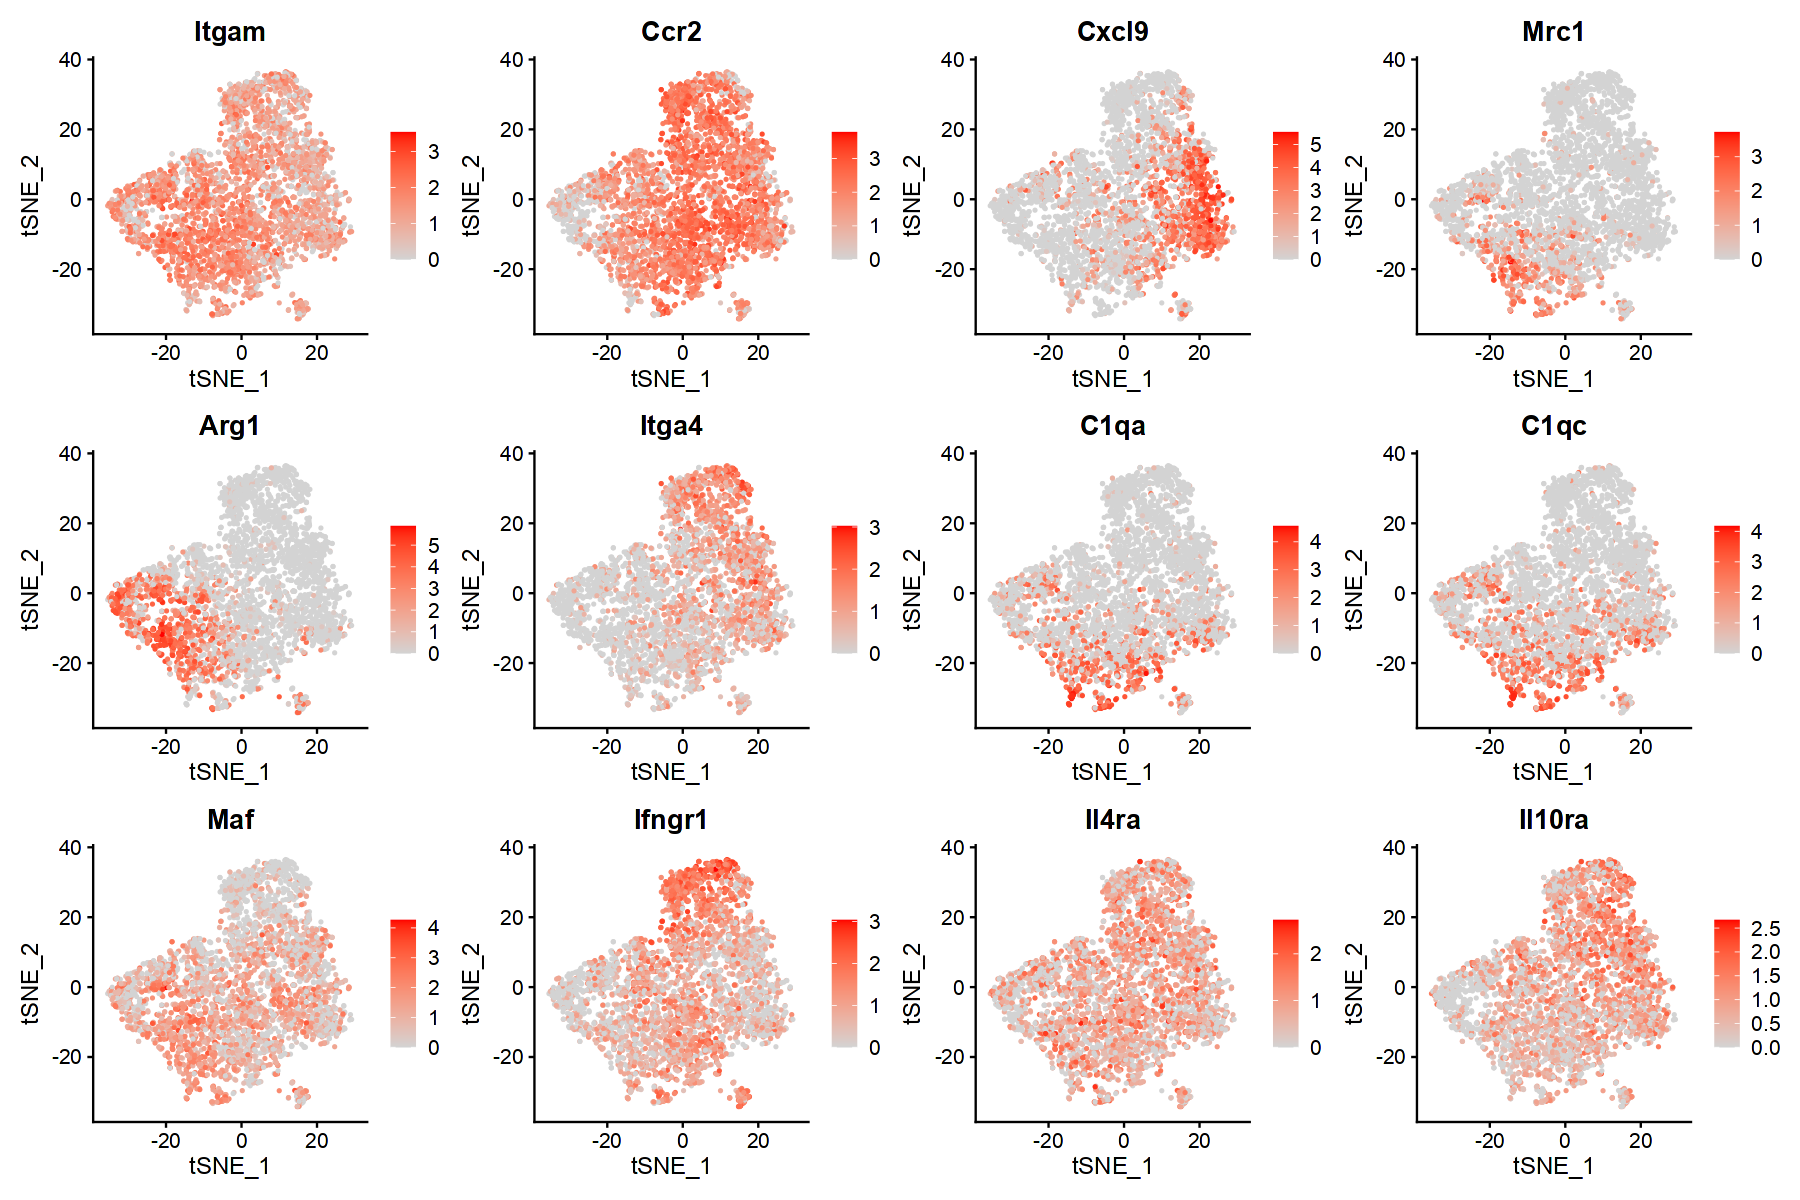

In [10]:
Idents(Mono) <- Mono$RNA_snn_res.0.2

options(repr.plot.width = 15, repr.plot.height = 10)
FeaturePlot(Mono, features = c("Itgam","Ccr2", "Cxcl9","Mrc1","Arg1", "Cxcl9", "Itga4", "C1qa", "C1qc", "Maf", "Ifngr1", "Il4ra", "Il10ra"), 
            ncol=4, reduction = "tsne", cols = c("lightgrey", "red"))

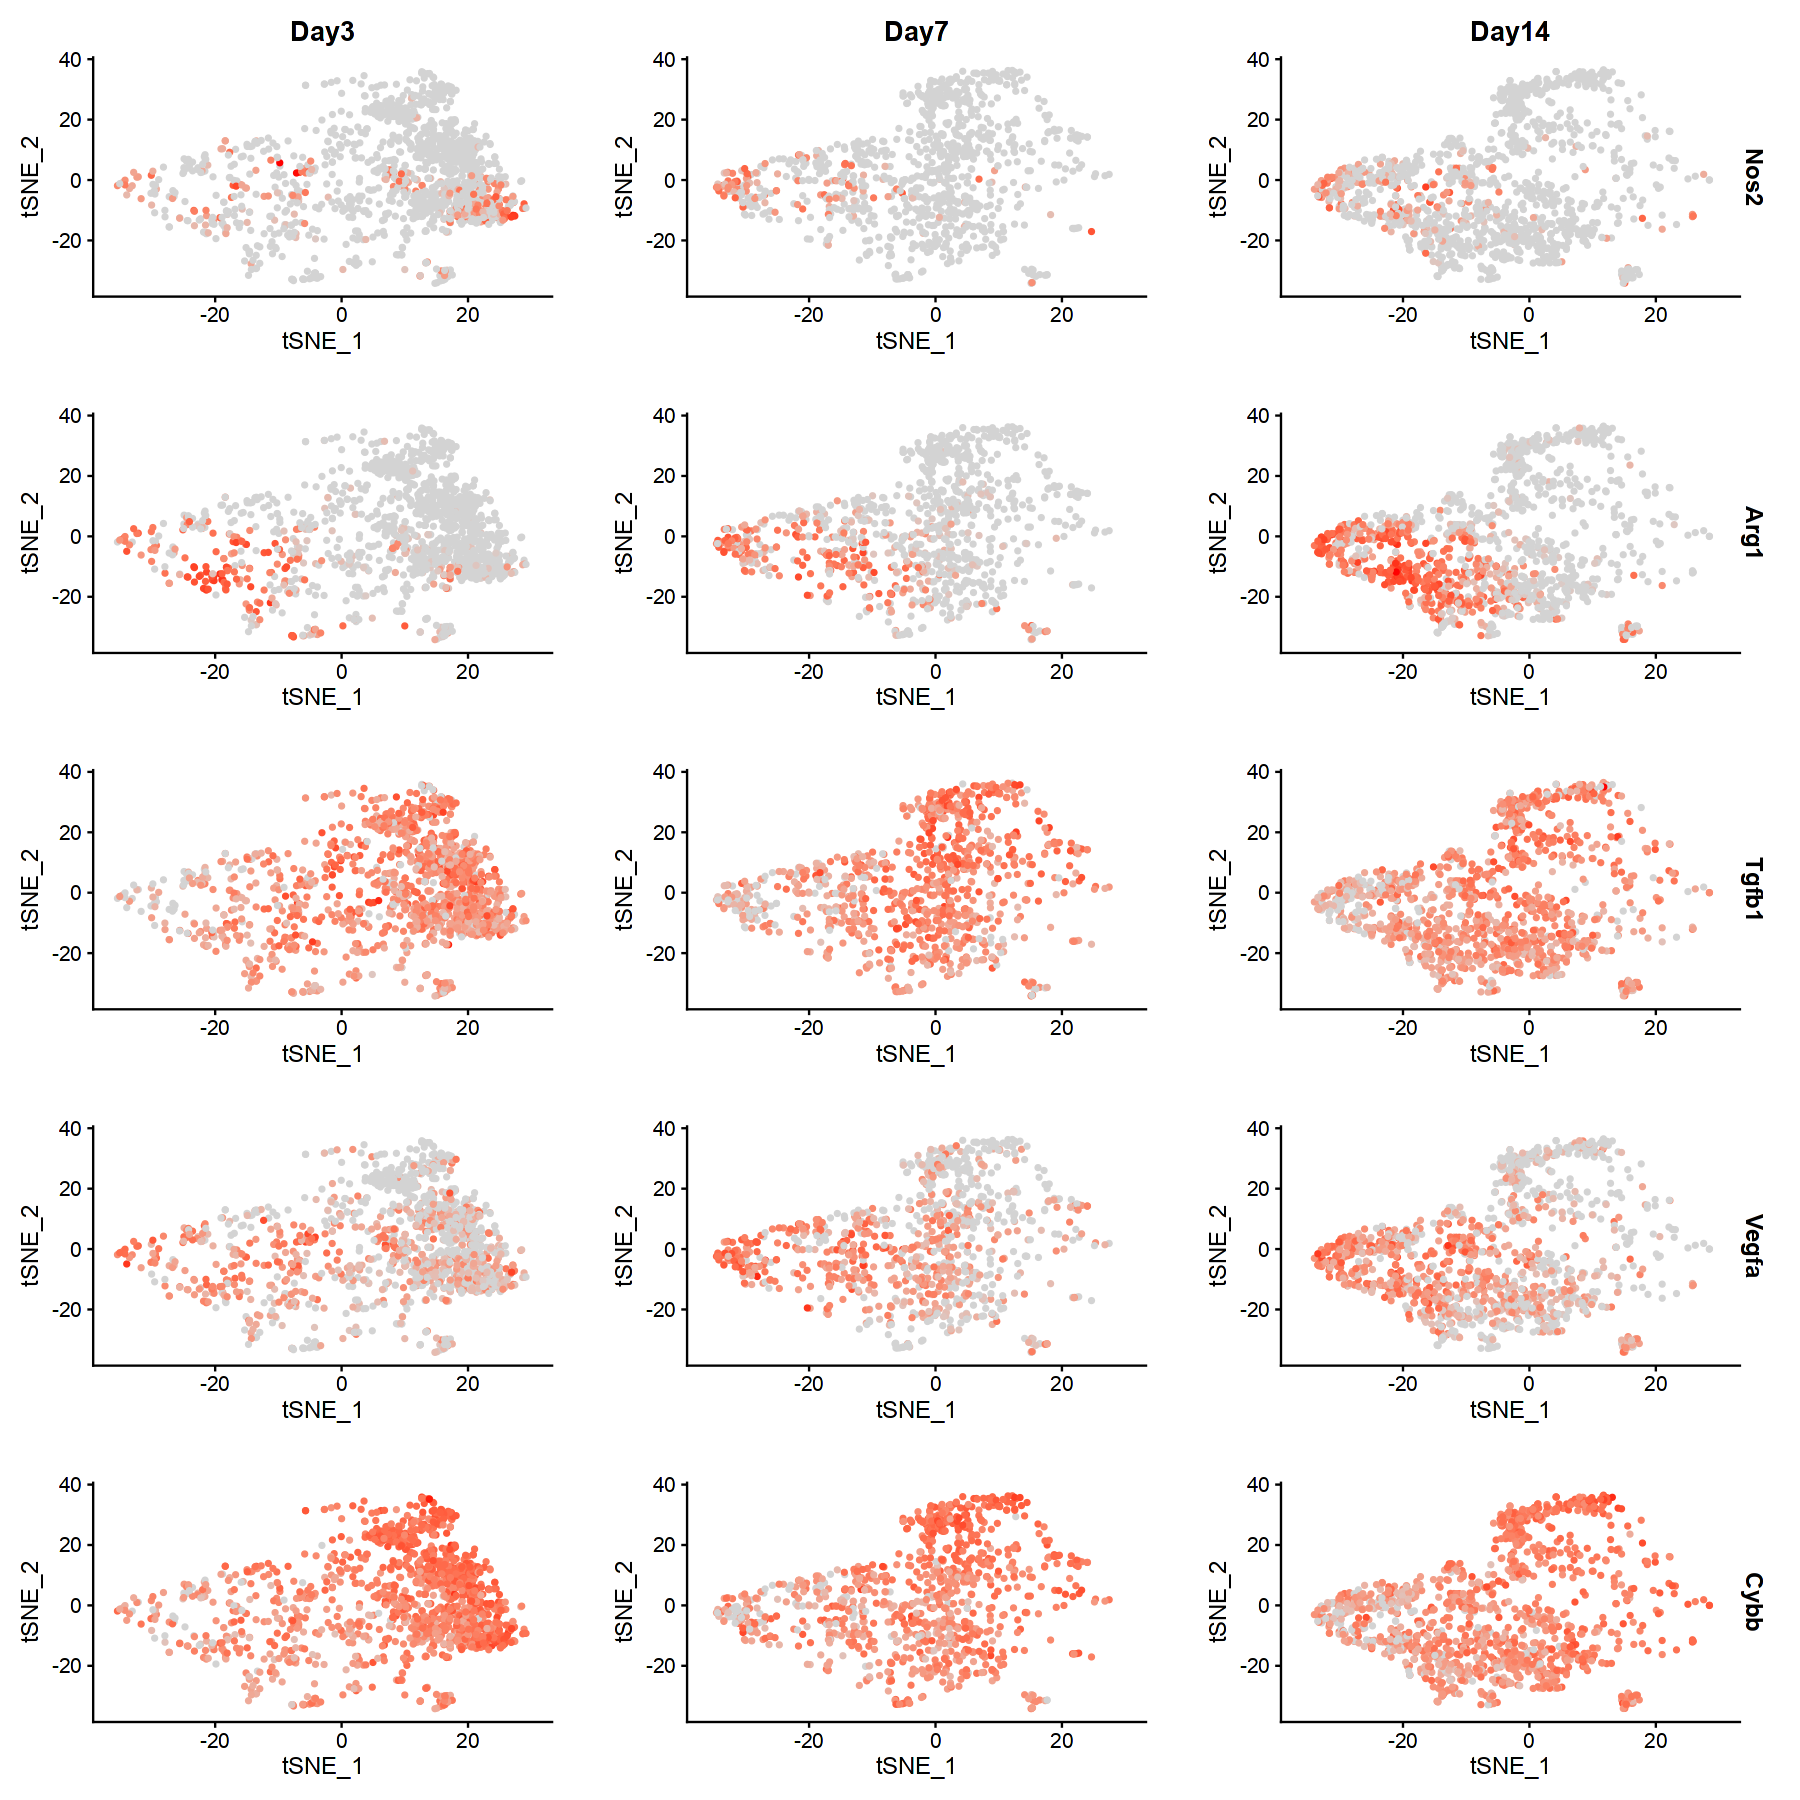

In [11]:
options(repr.plot.width = 15, repr.plot.height = 15)
FeaturePlot(Mono, features = c("Nos2", "Arg1", "Tgfb1", "Vegfa", "Cybb"), #order=TRUE, # Nox2=Cybb
            ncol=4, reduction = "tsne", cols = c("lightgrey", "red") ,split.by='day')

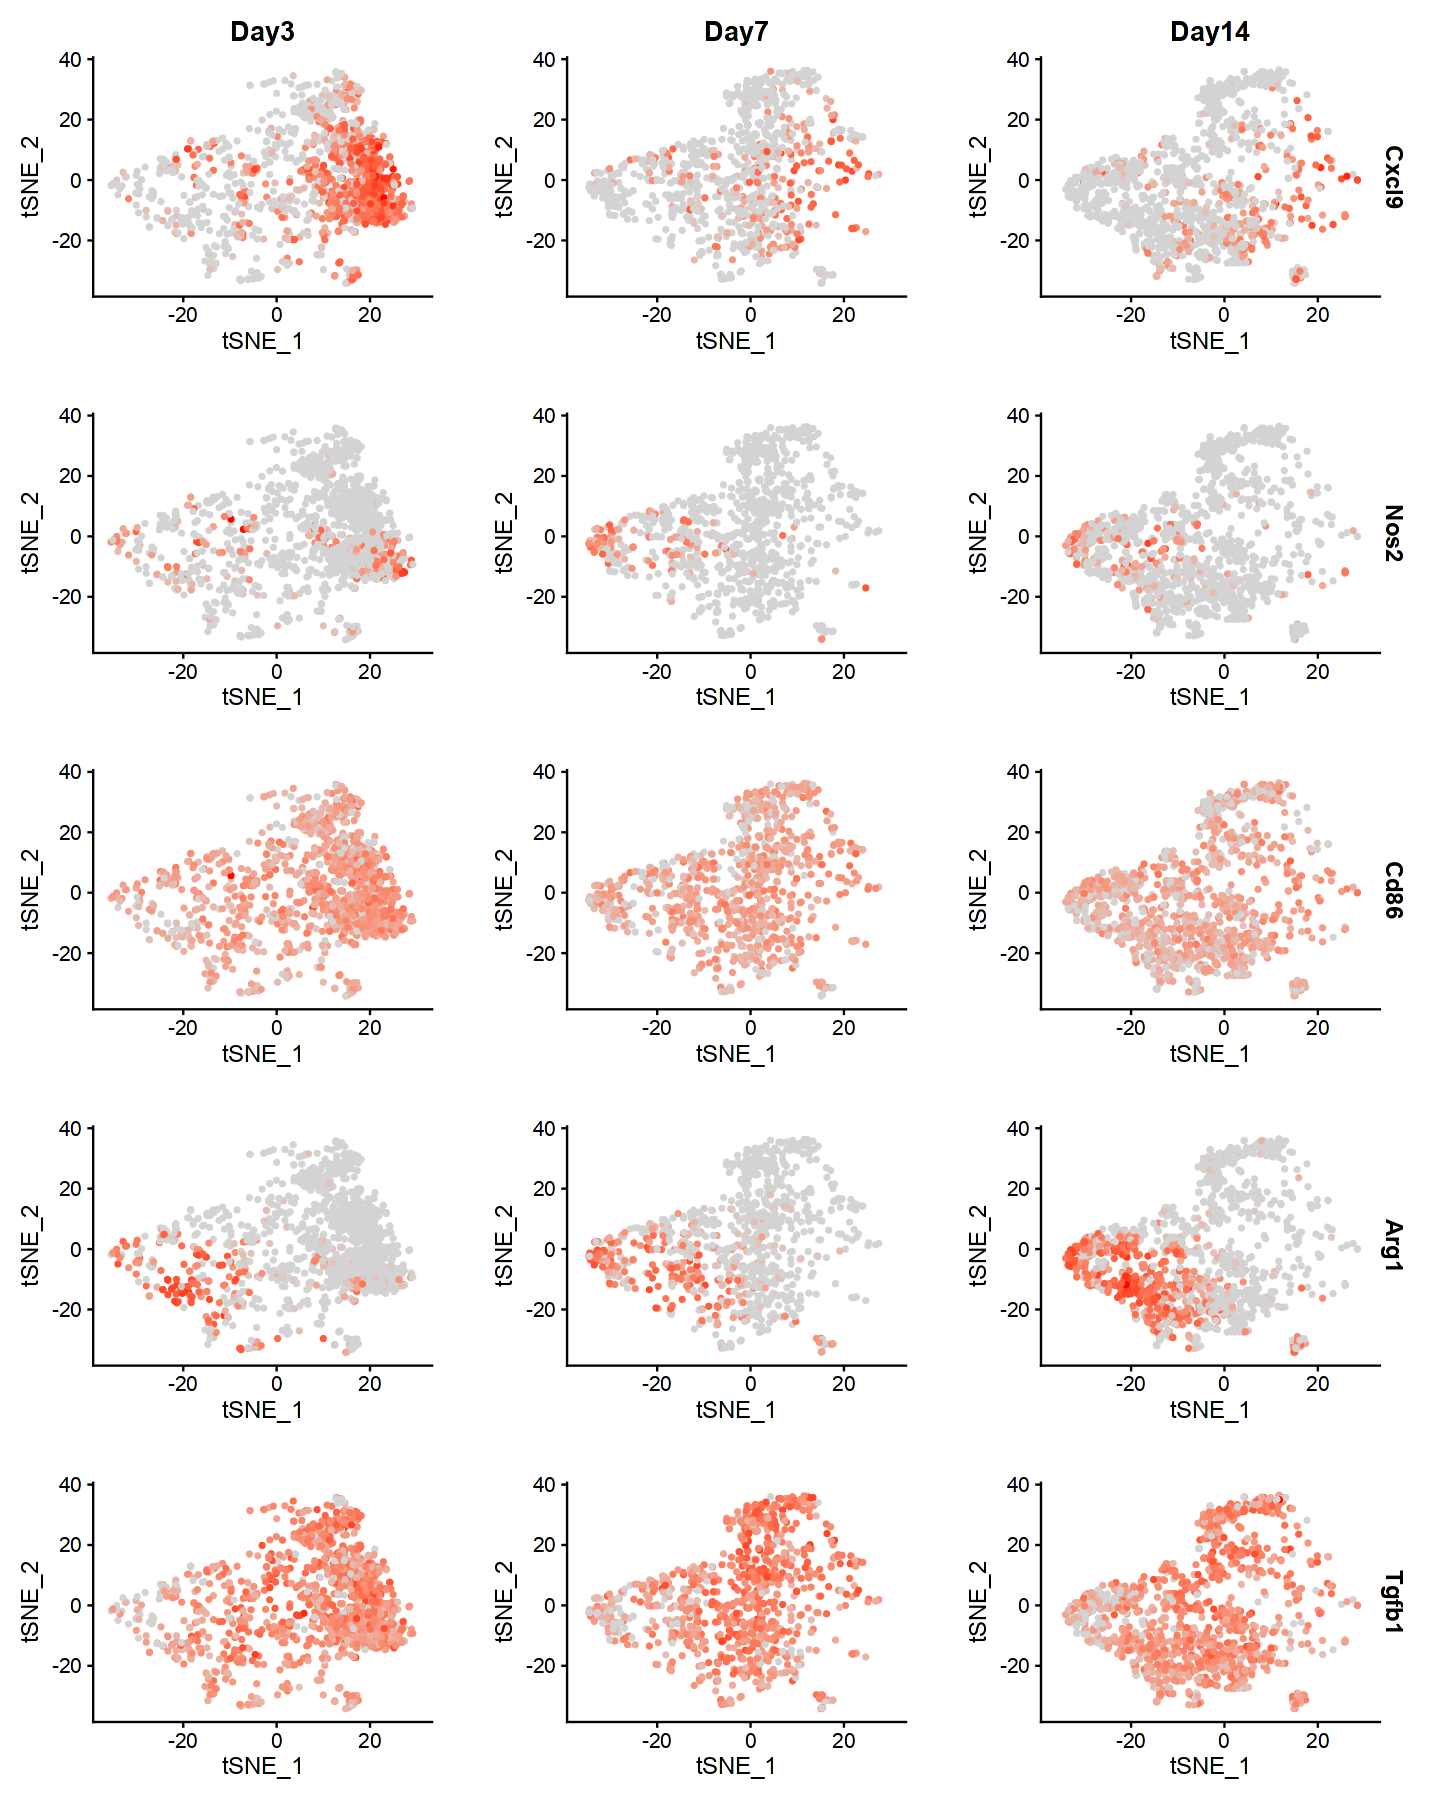

In [12]:
options(repr.plot.width = 12, repr.plot.height = 15)
FeaturePlot(Mono, features = c("Cxcl9", "Nos2", "Cd86", "Arg1", "Tgfb1"), #order=T, 
            ncol=3, reduction = "tsne", cols = c("lightgrey", "red"), split.by='day')

In [13]:
dir.create(file.path(dir_int, "01_clustering"), showWarnings = FALSE, recursive = TRUE)
saveRDS(Mono, file = file.path(dir_int,"01_clustering","mono.rds"))

# 2. Visualization

In [14]:
Mono <- readRDS(file.path(dir_int,"01_clustering","mono.rds"))

## Fig. 6b

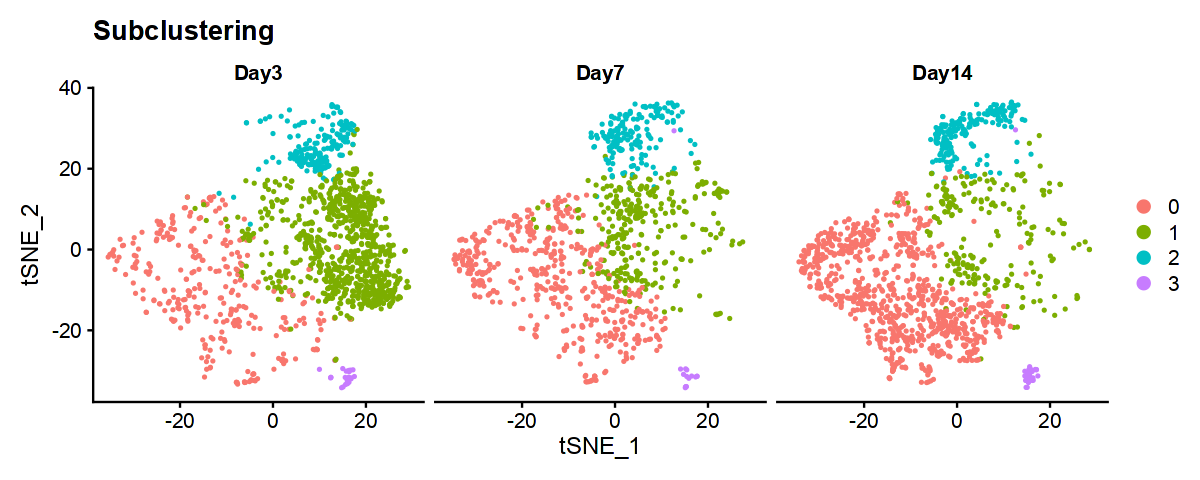

In [15]:
options(repr.plot.width = 10, repr.plot.height = 4)
p1 <- DimPlot(Mono, reduction = "tsne", label = FALSE, split.by='day') + 
 ggtitle("Subclustering") 
#theme(strip.text = element_text(size = 30)) 
p1
ggsave(file.path(dir_fig,"01_tsne.jpeg"), plot = p1, width = 10, height = 4, dpi = 300)
ggsave(file.path(dir_fig,"01_tsne.pdf"), plot = p1, width = 10, height = 4, dpi = 300)

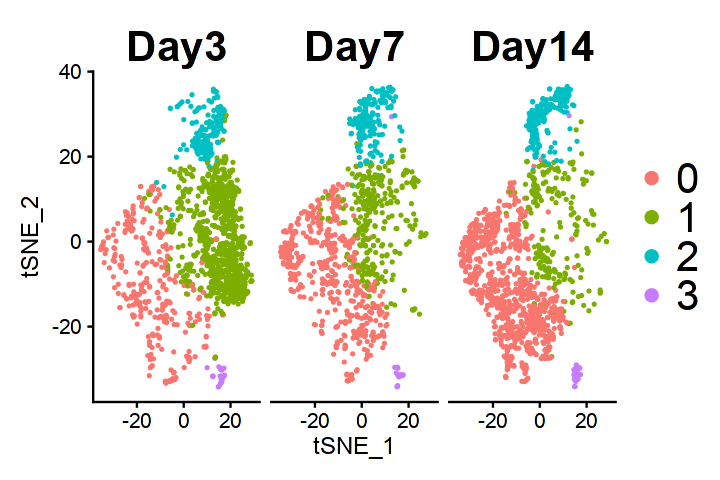

In [131]:
options(repr.plot.width = 6, repr.plot.height = 4)
p1_large <- DimPlot(Mono, reduction = "tsne", label = FALSE, split.by='day') + 
theme(legend.text = element_text(size = 25),strip.text = element_text(size = 25)) 
p1_large
ggsave(file.path(dir_fig,"01_tsne_large.jpeg"), plot = p1_large, width = 6, height = 4, dpi = 300)
ggsave(file.path(dir_fig,"01_tsne_large.pdf"), plot = p1_large, width = 6, height = 4, dpi = 300)

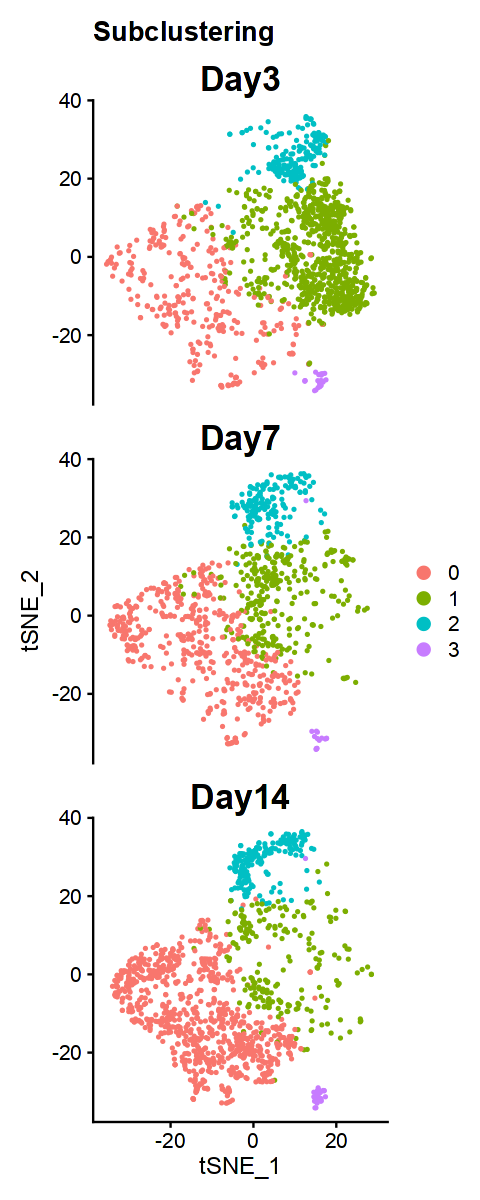

In [16]:
options(repr.plot.width = 4, repr.plot.height = 10)
p1 <- DimPlot(Mono, reduction = "tsne", label = FALSE, split.by='day', ncol=1) + 
 ggtitle("Subclustering") + theme(strip.text = element_text(size = 20)) 
p1
ggsave(file.path(dir_fig,"01_tsne_v.jpeg"), plot = p1, width = 4, height = 10, dpi = 300)
ggsave(file.path(dir_fig,"01_tsne_v.pdf"), plot = p1, width = 4, height = 10, dpi = 300)

## Fig. Heatmap

In [17]:
# marker
mono_markers_annotate <- FindAllMarkers(
  Mono,
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25
)

mono_markers_annotate %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10_mono

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



In [18]:
top10_mono

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene   
1  3.462623e-300 2.844372   0.828 0.291 5.625031e-296 0       Dab2   
2  7.015404e-293 2.102651   0.964 0.726 1.139652e-288 0       Ctsd   
3  1.225566e-282 1.093510   1.000 1.000 1.990932e-278 0       Ftl1   
4  9.721155e-281 2.140088   0.957 0.686 1.579202e-276 0       Lgmn   
5  2.153906e-267 1.188444   0.999 0.999 3.499020e-263 0       Gapdh  
6  4.493293e-262 1.610534   0.976 0.712 7.299354e-258 0       Mif    
7  2.262731e-256 2.127767   0.837 0.295 3.675806e-252 0       C3ar1  
8  6.844830e-229 5.191171   0.571 0.101 1.111943e-224 0       Arg1   
9  2.235838e-225 1.655427   1.000 1.000 3.632120e-221 0       Fth1   
10 6.017810e-224 1.661967   0.951 0.583 9.775933e-220 0       Basp1  
11  0.000000e+00 2.565260   0.958 0.605  0.000000e+00 1       Gbp2   
12 4.324745e-265 1.960212   0.925 0.516 7.025548e-261 1       Ifi47  
13 4.492742e-259 2.897713   0.761 0.273 7.298460e-255 1       Cnn3   
14 3.466973e-258 2.526191   0.816 0.317 5.632098e-254 1       Calhm6 
15 4.614264e-246 1.412691   0.965 0.763 7.495872e-242 1       Zbp1   
16 5.375352e-244 1.308353   0.999 0.883 8.732259e-240 1       Samhd1 
17 8.377954e-232 1.822529   0.874 0.421 1.360999e-227 1       Gbp3   
18 4.014307e-215 1.296677   0.964 0.785 6.521242e-211 1       Tap1   
19 2.561097e-208 1.663577   0.878 0.459 4.160501e-204 1       Gbp7   
20 1.204135e-205 1.714963   0.876 0.547 1.956117e-201 1       Slamf8 
21 1.444808e-226 3.988943   0.542 0.059 2.347091e-222 2       Ccdc88c
22 2.336776e-221 3.277231   0.535 0.056 3.796093e-217 2       Cx3cr1 
23 4.487089e-219 3.239784   0.780 0.200 7.289277e-215 2       Pou2f2 
24 4.805199e-219 3.063134   0.775 0.213 7.806046e-215 2       Add3   
25 1.199590e-209 2.211169   0.958 0.482 1.948735e-205 2       Adgre5 
26 3.870504e-196 1.259454   1.000 0.963 6.287633e-192 2       Gpx1   
27 1.409661e-189 1.135346   0.998 0.958 2.289994e-185 2       Coro1a 
28 1.399963e-178 2.565875   0.763 0.263 2.274239e-174 2       Ypel3  
29 2.161381e-177 1.331518   0.997 0.926 3.511163e-173 2       Msrb1  
30 9.563546e-176 1.889467   0.953 0.624 1.553598e-171 2       Smpdl3a
31  0.000000e+00 6.882543   0.901 0.013  0.000000e+00 3       Gimap3 
32  0.000000e+00 6.820036   0.859 0.013  0.000000e+00 3       Lck    
33  0.000000e+00 7.007799   0.817 0.009  0.000000e+00 3       Ablim1 
34  0.000000e+00 7.012309   0.789 0.009  0.000000e+00 3       Skap1  
35  0.000000e+00 6.551198   0.761 0.014  0.000000e+00 3       Sept1  
36  0.000000e+00 6.454130   0.718 0.010  0.000000e+00 3       Gimap7 
37  0.000000e+00 7.753240   0.690 0.004  0.000000e+00 3       Cd247  
38  0.000000e+00 6.272514   0.648 0.008  0.000000e+00 3       Itk    
39 7.883805e-298 7.805568   0.493 0.003 1.280724e-293 3       Bcl11b 
40 1.210245e-288 6.246178   0.606 0.008 1.966042e-284 3       Zap70

Warning message in DoHeatmap(Mono, features = top10_mono$gene, label = FALSE):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: Msrb1, Coro1a, Gpx1, Tap1, Zbp1”


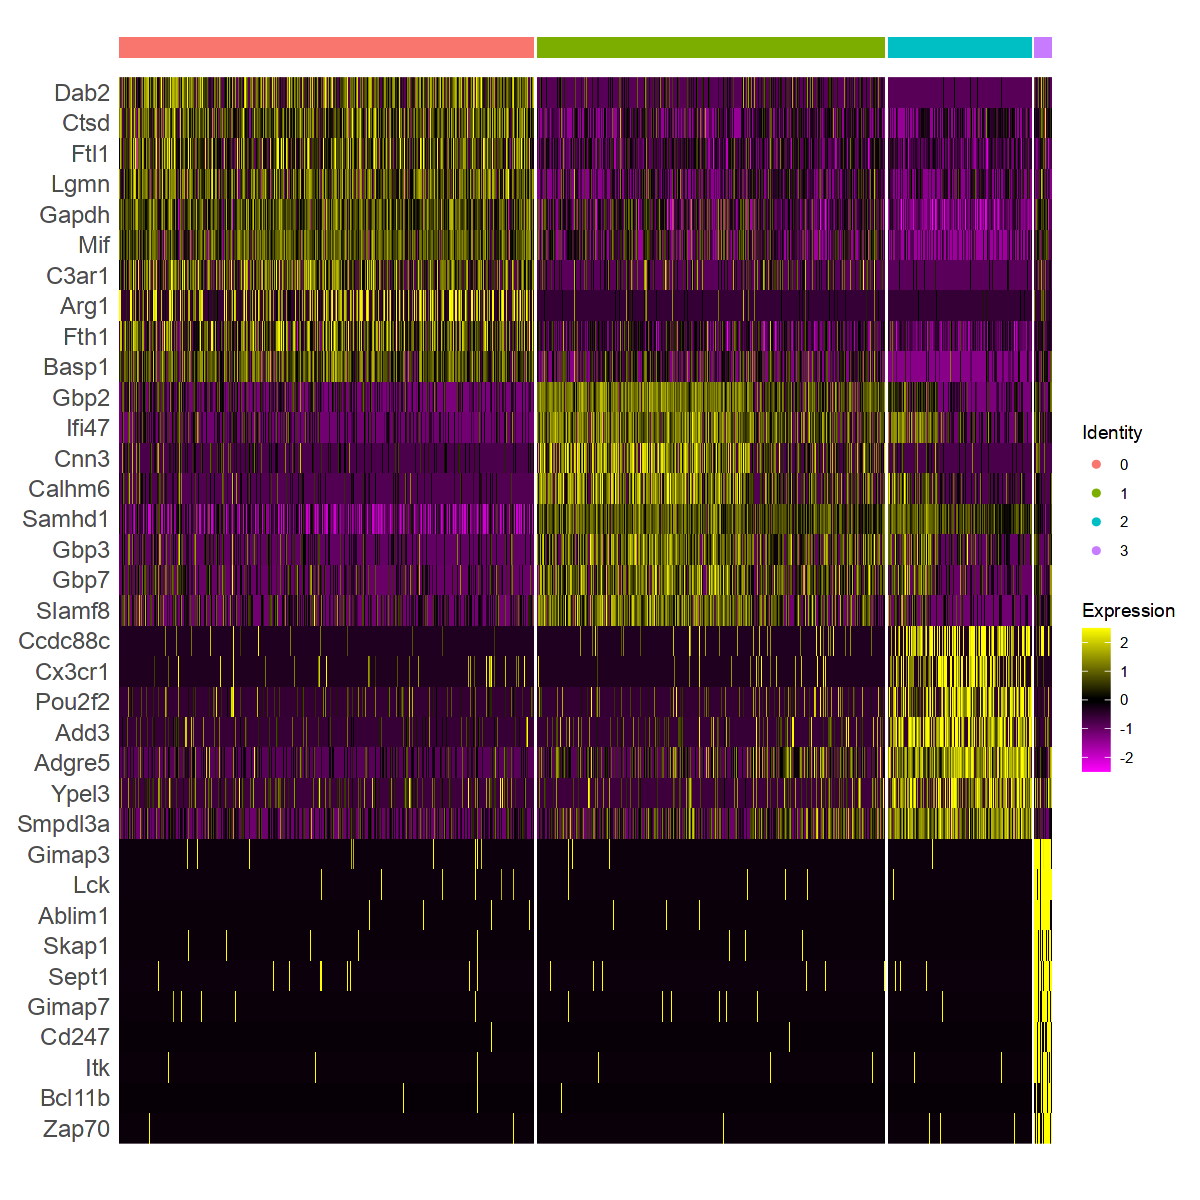

In [104]:
options(repr.plot.width = 10, repr.plot.height = 10)
p2<-DoHeatmap(Mono, features = top10_mono$gene, label=FALSE)+theme(axis.text.y = element_text(size = 14))
p2

ggsave(file.path(dir_fig,"02_heatmap.jpeg"), plot = p2, width = 10, height = 10, dpi = 300)
ggsave(file.path(dir_fig,"02_heatmap.pdf"), plot = p2, width = 10, height = 10, dpi = 300)

## Fig. Markergene

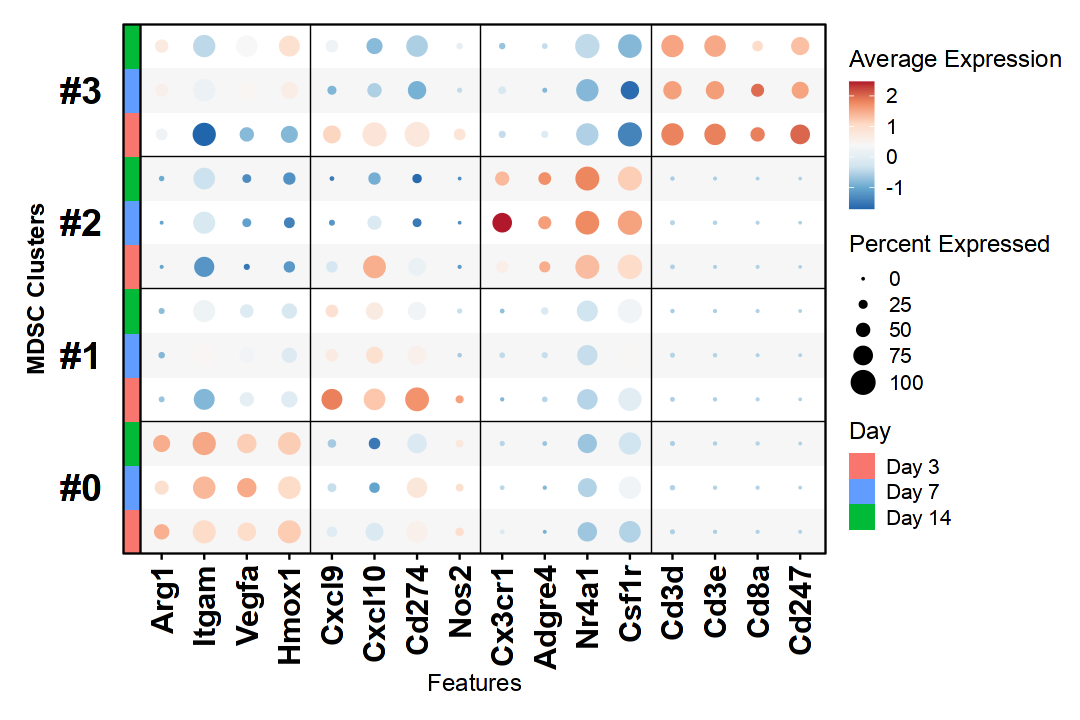

In [133]:
# ============================================================
# Parameters & inputs
# ============================================================
cluster_specific_genes1 <- c(
  "Arg1","Itgam","Vegfa","Hmox1",
  "Cxcl9","Cxcl10","Cd274","Nos2", 
  "Cx3cr1","Adgre4","Nr4a1","Csf1r",
  "Cd3d","Cd3e","Cd8a","Cd247"
)
cluster_genes <- cluster_specific_genes1
n_clusters  <- 4                 # clusters 0–4
n_days      <- 3                 # Day3, Day7, Day14
total_rows  <- n_clusters * n_days

# Horizontal separators between clusters (every 3 rows)
h_lines <- seq(n_days + 0.5, total_rows, by = n_days)
# Vertical separators every 4 genes
v_lines <- seq(4 + 0.5, length(cluster_genes) - 0.5, by = 4)
# Empty y-axis labels (we’ll replace visually with tiles)
new_labels <- rep(c("", "", ""), times = n_clusters)
# Midpoints of each cluster block for big cluster labels (0–4)
cluster_midpoints <- seq(from = n_days/2 + 0.5, by = n_days, length.out = n_clusters)
# Alternating stripe background (odd rows)
stripe <- data.frame(
  ymin = seq(0.5, total_rows-1,     by = 2),
  ymax = seq(1.5, total_rows, by = 2)
)
# Day color tiles to the left (inside panel)
tile_df <- data.frame(
  y   = seq_len(total_rows),
  x   = 0.3,                                  # center x of the tile column
  day = factor(rep(c("3","7","14"), times = n_clusters), levels = c("3","7","14"))
)
# Color palette for Day legend
day_colors <- c("3"="#F8766D", "7"="#619CFF", "14"="#00BA38")

# 
outsideline = 0.5

options(repr.plot.width = 9, repr.plot.height = 6)
# ============================================================
# Base DotPlot (Seurat -> ggplot)
# ============================================================
p <- DotPlot(Mono, features = cluster_genes, cols = "RdBu", split.by = "day")
# Put stripe background UNDER the dots by inserting the layer
stripe_layer <- geom_rect(
  data = stripe, inherit.aes = FALSE,
  aes(xmin = -Inf, xmax = Inf, ymin = ymin, ymax = ymax),
  fill = "grey90", alpha = 0.35
)
p$layers <- c(list(stripe_layer), p$layers) # insert as bottom-most layer

# ============================================================
# Styling, separators, and axis handling
# ============================================================
p2 <- p + labs(y = "MDSC Clusters")+
  theme(
    axis.text.x   = element_text(angle = 90, vjust = 0.5, hjust = 1, size=18, face  = "bold"),
    axis.line.x   = element_blank(),
    axis.line.y   = element_blank(),
    axis.title.y  = element_text(
      angle = 90,          
      vjust = 0.5,         
      hjust = 0.5,         
      size  = 14,          
      face  = "bold",      
      margin = margin(r = 40)
    ),
    axis.ticks.y  = element_blank(),
    panel.border  = element_rect(color = "black", fill = NA, size = outsideline),
    plot.margin   = unit(c(1,1,1,1), "lines") # extra left margin for big labels if needed
  ) +
  # Cluster and 4-gene separators
  geom_hline(yintercept = h_lines, color = "black", linewidth = 0.3) +
  geom_vline(xintercept = v_lines, color = "black", linewidth = 0.3) +
  # Allow drawing outside panel (for -Inf text if you later move it out)
  coord_cartesian(clip = "off")

# ============================================================
# Left-side cluster labels (big numbers)
# ============================================================
p2 <- p2 +
  annotate(
    "text",
    x        = -Inf,                 # left bound of the panel
    y        = cluster_midpoints,
    label    = c("#0","#1","#2","#3"),
    hjust    = 1.5,                    # push a bit further left of the bound
    vjust    = 0.5,
    size     = 8,
    fontface = "bold"
  )

# ============================================================
# Day tiles (act like colored y-axis labels) + pseudo y-axis line
# ============================================================
p2 <- p2 +
  geom_tile(
    data = tile_df, inherit.aes = FALSE,
    aes(x = x, y = y, fill = day),
    width = 0.4, height = 1
  ) +
  # Pseudo y-axis line just to the right edge of the tiles
  geom_vline(xintercept = 0.5, color = "black", linewidth = outsideline) +
  # Day legend (fixed order 3 -> 7 -> 14)
  scale_fill_manual(
    name   = "Day",
    values = day_colors,
    breaks = c("3","7","14"),
    labels = c("Day 3","Day 7","Day 14")
  )+
# Remove y-axis text (replaced by tiles)
scale_y_discrete(labels = new_labels, expand = c(0, 0))

p2
ggsave(file.path(dir_fig, "03_dotplot.jpeg"), plot = p2, width = 9, height = 6, dpi = 300)
ggsave(file.path(dir_fig, "03_dotplot.pdf"), plot = p2, width = 9, height = 6, dpi = 300)

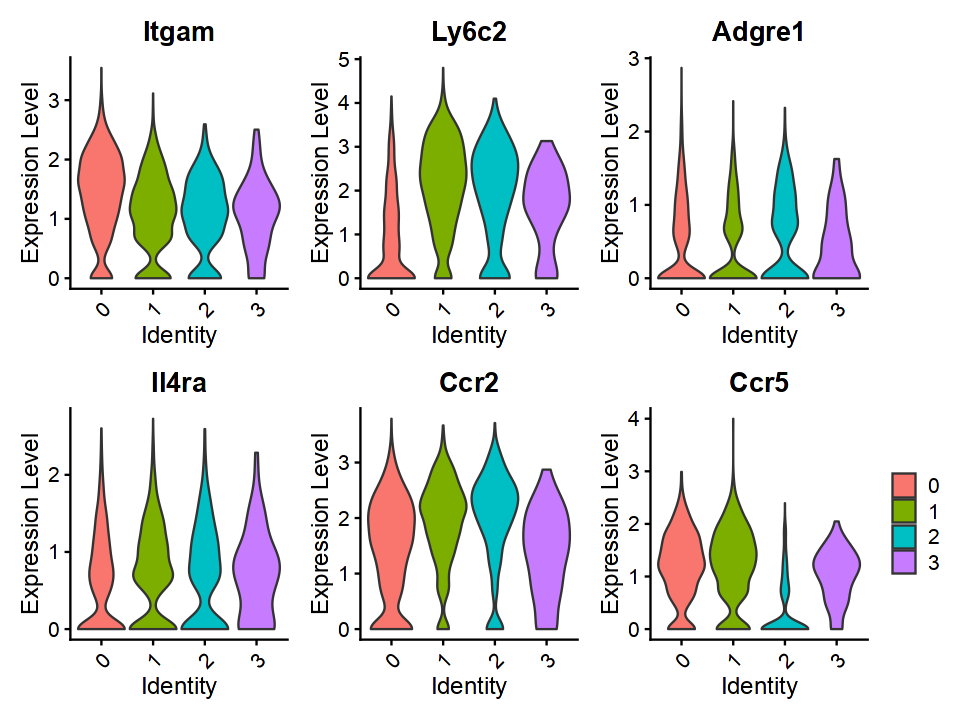

In [134]:
options(repr.plot.width = 8, repr.plot.height = 6)
VlnPlot(Mono, c("Itgam","Ly6c2", "Adgre1", "Il4ra", "Ccr2", "Ccr5"), pt.size =0, ncol=3)+theme(legend.position="right")

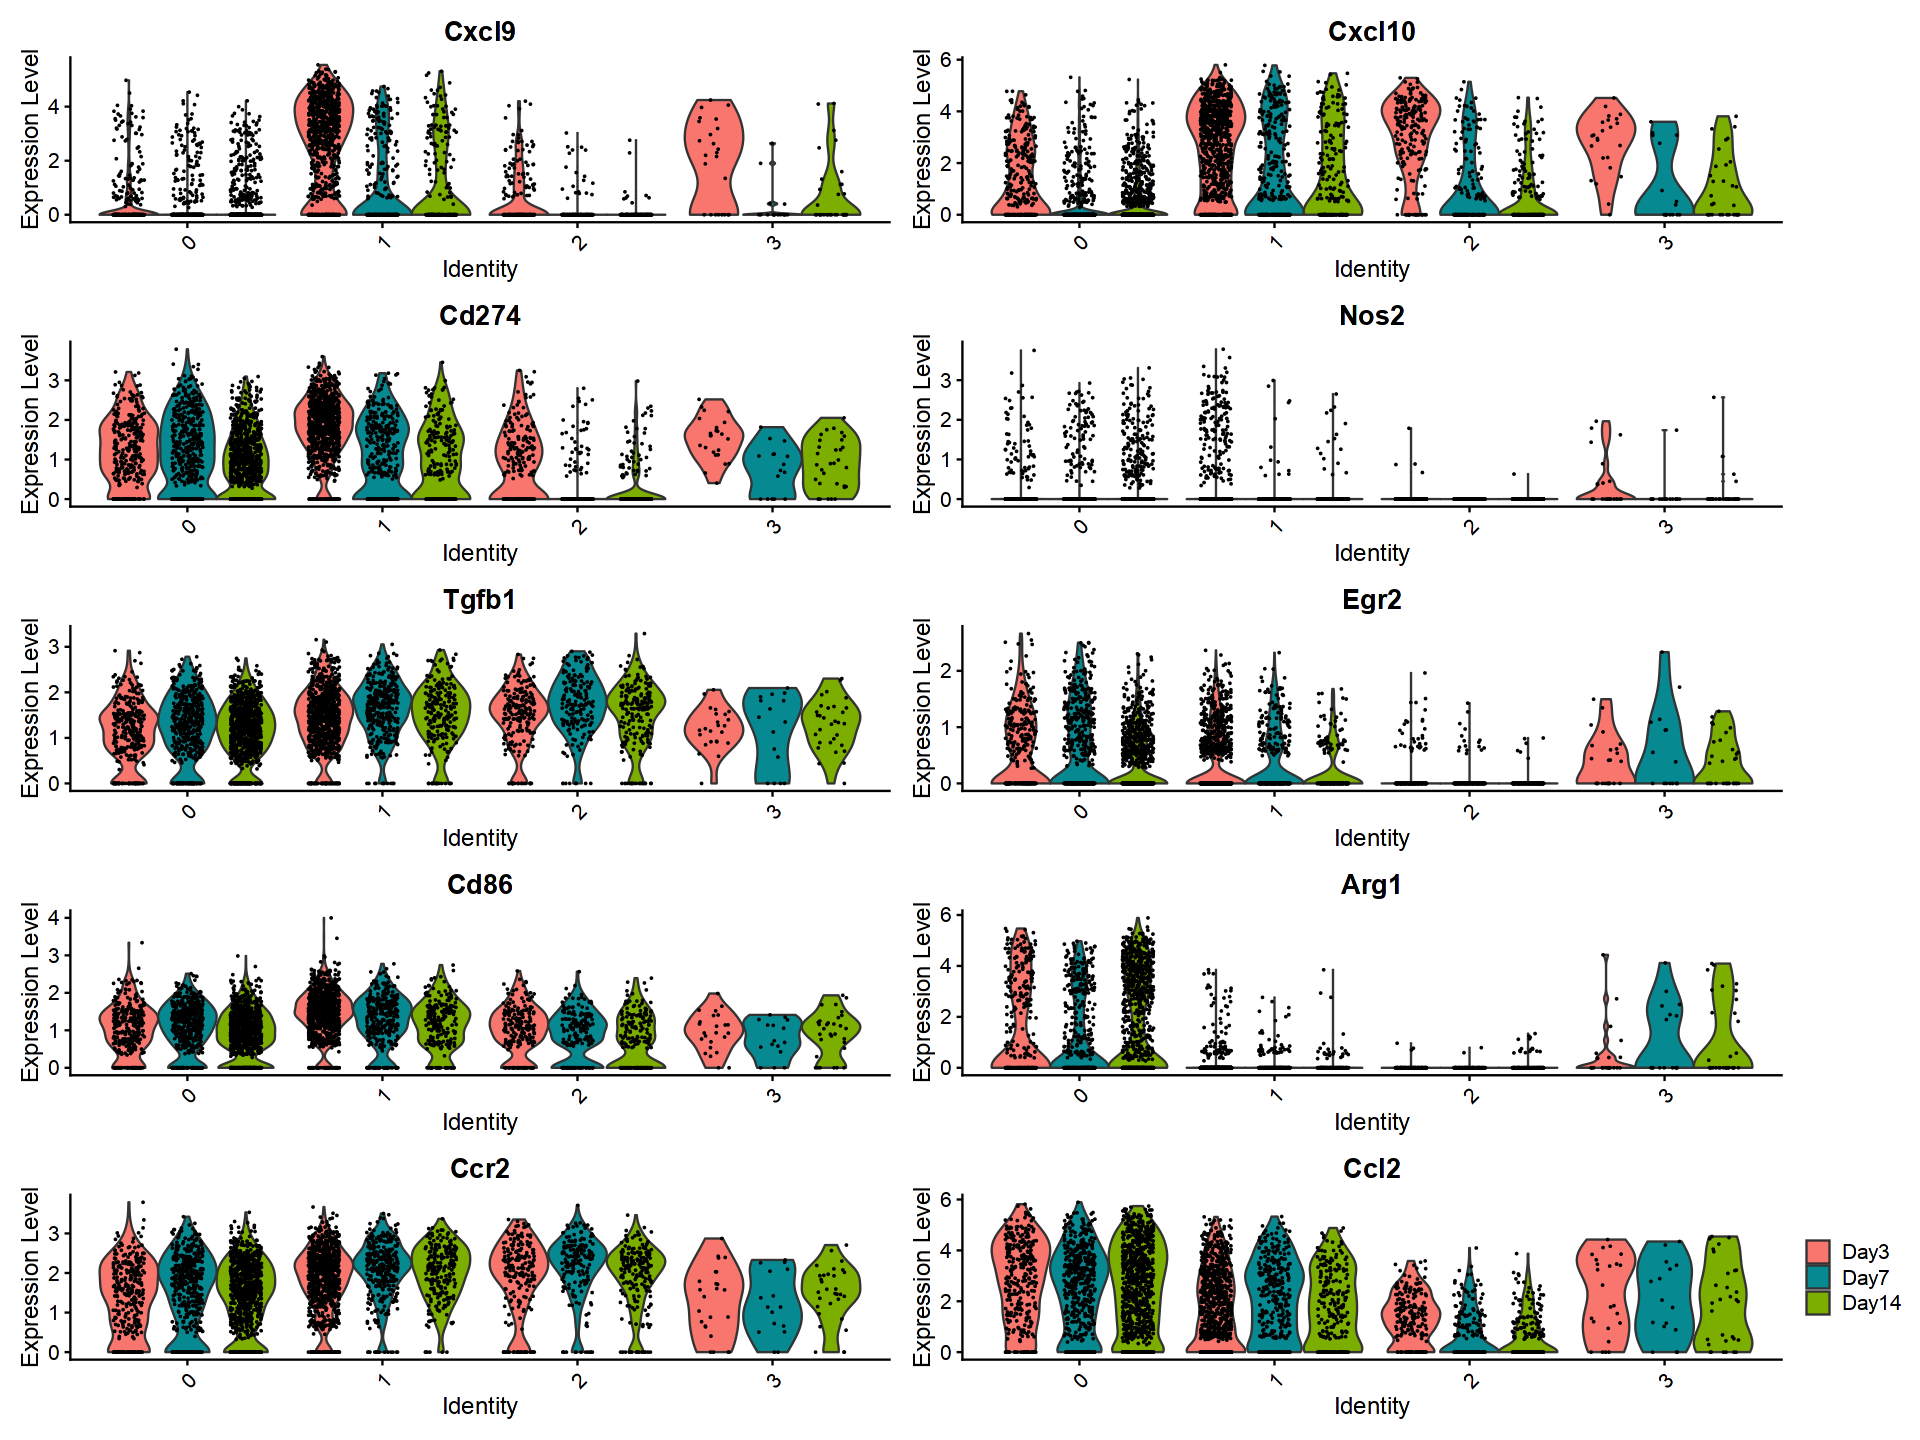

In [135]:
options(repr.plot.width = 16, repr.plot.height = 12)
VlnPlot(Mono, c("Cxcl9", "Cxcl10", "Cd274", "Nos2","Tgfb1","Egr2", "Cd86", "Arg1", "Ccr2", "Ccl2"), pt.size =0.01, ncol=2, split.by='day')+theme(legend.position="right")

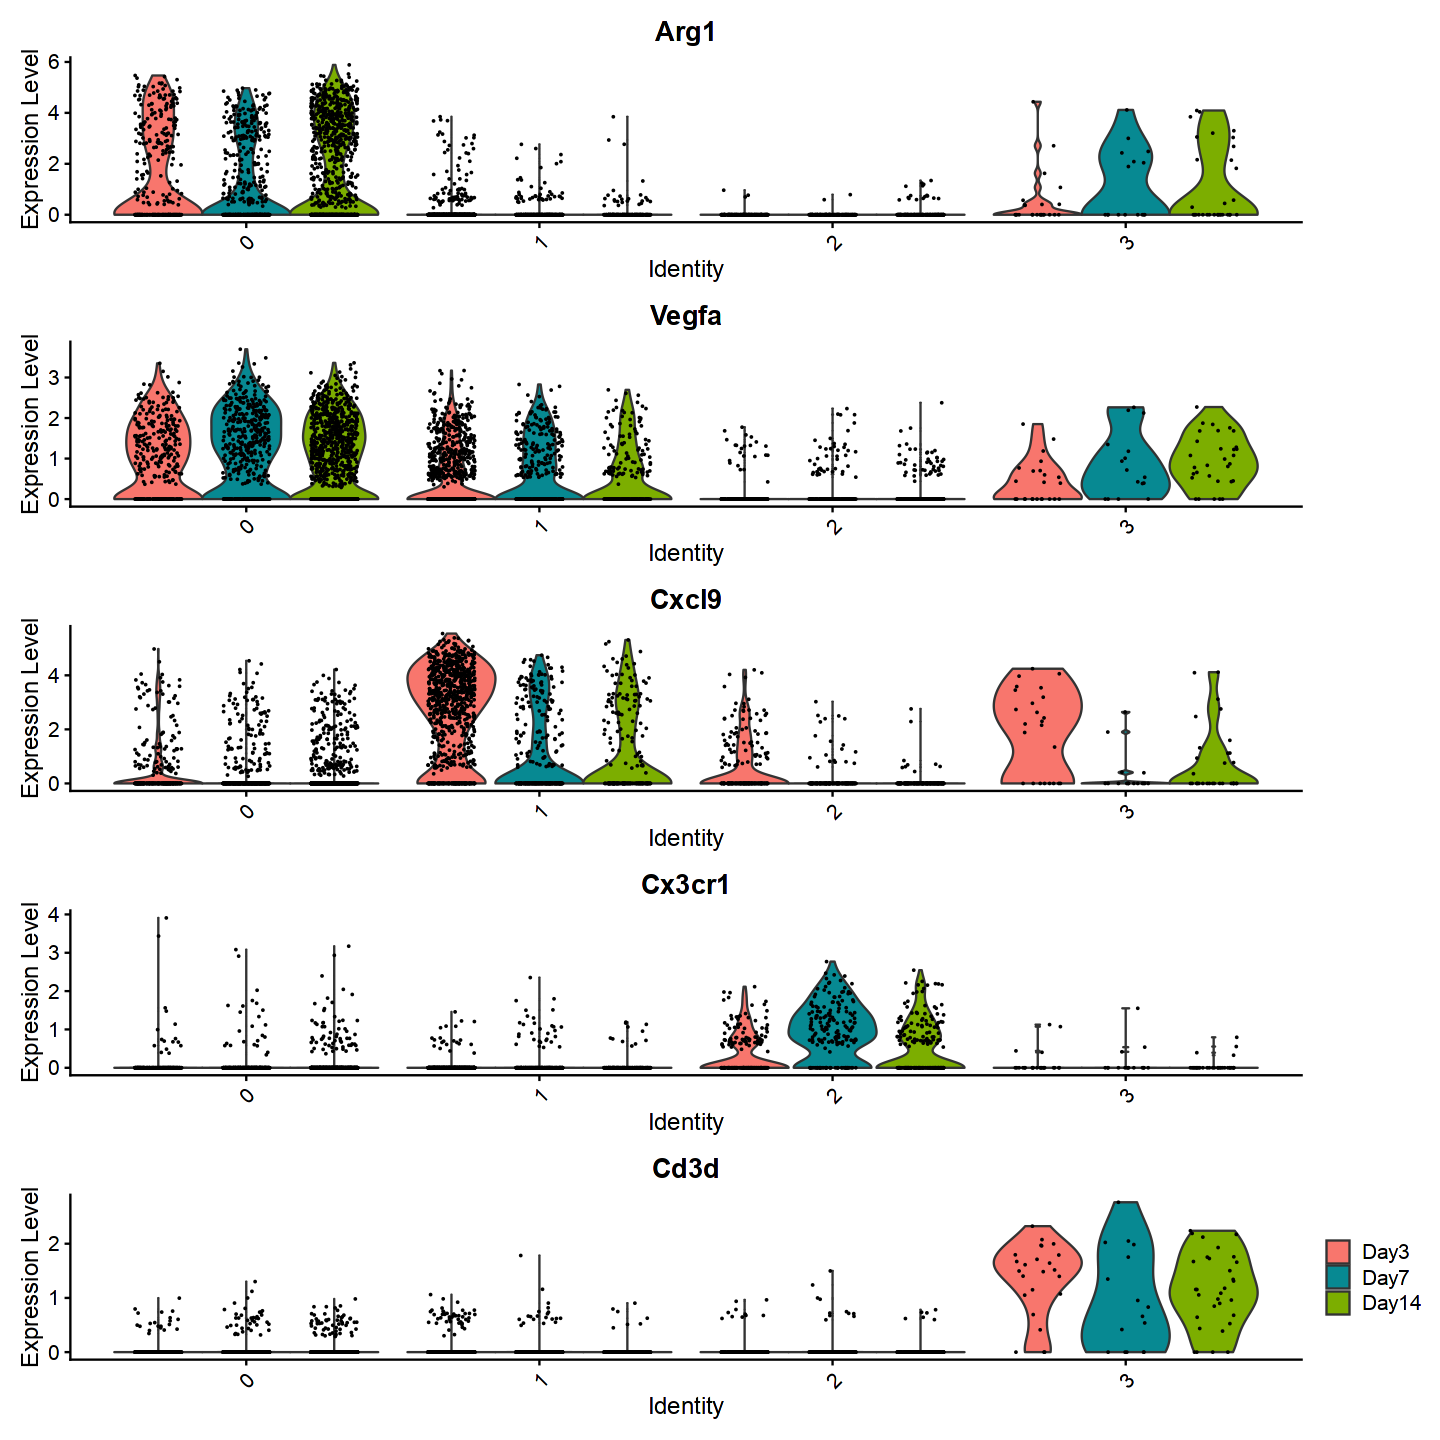

In [136]:
options(repr.plot.width = 12, repr.plot.height = 12)
VlnPlot(Mono, c("Arg1", "Vegfa","Cxcl9", "Cx3cr1","Cd3d"), pt.size =0.01, ncol=1, split.by='day')+theme(legend.position="right")

# Proportion

## Fig. 6d

In [137]:
get_group_proportions <- function (seuratobj, group.by = "active.ident") {
  if (group.by == "active.ident") {
    seuratobj[["active.ident"]] <- seuratobj@active.ident
  }
  # gets the total number of cells within each group
  total_populations <- seuratobj@meta.data %>% group_by(orig.ident) %>% summarize (total.pop = n())
  # gets the proportion of cells for each cell type within a group by dividing by the total
  count_populations <- seuratobj@meta.data %>% group_by_at(vars(group.by, "orig.ident")) %>% summarize (n = n())
  count_populations <- left_join(count_populations, total_populations, by = "orig.ident")
  count_populations <- count_populations %>% mutate (proportion = n/total.pop)
  count_populations
}

get_group_proportions(Mono)

`summarise()` has grouped output by 'active.ident'. You can override using the `.groups` argument.


active.ident orig.ident n   total.pop proportion
1  0            day03      307 1383      0.22198120
2  0            day07      478  994      0.48088531
3  0            day14      874 1318      0.66312595
4  1            day03      851 1383      0.61532899
5  1            day07      323  994      0.32494970
6  1            day14      217 1318      0.16464340
7  2            day03      201 1383      0.14533623
8  2            day07      177  994      0.17806841
9  2            day14      196 1318      0.14871017
10 3            day03       24 1383      0.01735358
11 3            day07       16  994      0.01609658
12 3            day14       31 1318      0.02352049

In [138]:
plot_group_proportions <- function (seuratobj, graph.type = "dodge") {
  # get the proportions using get_group_proportions()
  count_populations <- get_group_proportions(seuratobj)
  # plot the proportions
  if (graph.type == "dodge"){
  ggplot(count_populations, aes (x = active.ident, y = proportion))+
    geom_bar (aes(fill = orig.ident), stat = "identity", position = "dodge")+
      theme(axis.text.x = element_text(angle=45, hjust = 1))
  } else if (graph.type == "stacked") {
  ggplot(count_populations, aes (x = orig.ident, y = proportion))+
    geom_bar (aes(fill = active.ident), stat = "identity", position = "fill")
  }
  else
    print("invalid graph type")
}

`summarise()` has grouped output by 'active.ident'. You can override using the `.groups` argument.


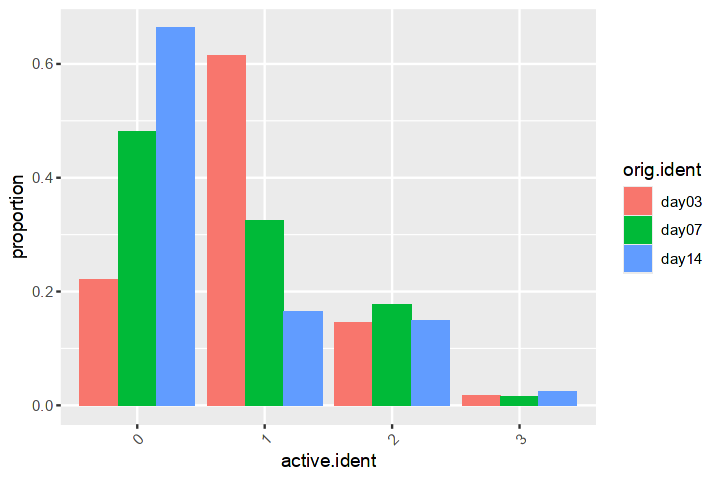

In [139]:
options(repr.plot.width = 6, repr.plot.height = 4)
p7 <- plot_group_proportions(Mono, graph.type = "dodge")
p7

`summarise()` has grouped output by 'active.ident'. You can override using the `.groups` argument.


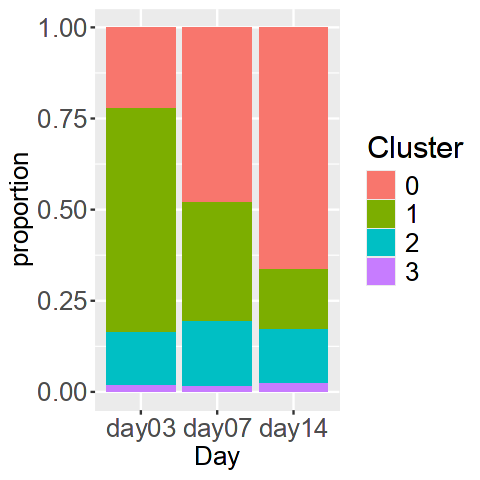

In [140]:
options(repr.plot.width = 4, repr.plot.height = 4)
p3_n <- plot_group_proportions(Mono, graph.type = "stacked")+
　labs(x = "Day", fill="Cluster") + 
  theme(
    legend.text = element_text(size = 15),
    legend.title = element_text(size = 18),  
    strip.text = element_text(size = 25),
    axis.title.x = element_text(size = 15),  
    axis.title.y = element_text(size = 15),  
    axis.text.x = element_text(size = 15),   
    axis.text.y = element_text(size = 15)   
  )
p3_n

ggsave(file.path(dir_fig, "04_proportion_n.jpeg"), plot = p3_n, width = 4, height = 4, dpi = 300)
ggsave(file.path(dir_fig, "04_proportion_n.pdf"), plot = p3_n, width = 4, height = 4, dpi = 300)

# Additional analysis

In [141]:
mono_markers_annotate %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 20) %>%
    ungroup() -> top20_mono

In [142]:
write.csv(top20_mono, file.path(dir_int,"top20_mono.csv"))